In [1]:
def sqrt_Newton(n): # Метод Ньютона
    x = n; y = (x + 1) // 2
    while y < x:
        x = y; y = (x + n // x) // 2
    return x


In [2]:
def gcd(a, b): # Алгоритм Евклида
    if b == 0: return a
    return gcd(b, a % b)


In [3]:
def sign(i): return 1 if i % 2 == 0 else -1

In [652]:
%%time

step = 1
Q = 0

def squfof(n, m=1):
    global step
    global Q
    step = 1
    Q=0
    if n % 2 == 0: 
        return 2
    
    g = gcd(n, m)
    
    if g > 1: 
        return g
    
  # (1) Инициализация
    
    #Проверяем, не является ли уже наше число n полным квадратом
    S = sqrt_Newton(n)
    
    if S ** 2 == n: 
        return S

    if (m * n) % 4 == 1:
        D = 2 * m * n
    else:
        D = m * n
    
    if m!=1 or n!=D:
        S = sqrt_Newton(D)

    i = 0
    P = S
    Q = D - P ** 2
    L = floor(2 * sqrt(2 * sqrt(D)))
    B = 2 * L
    Q_h = 1
    
    QUEUE = []
    
    #print("N =", n, ";", "D =", D, ";", "S =", S, ";", "L =", L, ";", "B =", B)
    #print ("-------------------------")
    #print(" Основной цикл:")
    #print ("i |","Q_(i-1)*(-1)^(i-1) |", "2 * P_n", "| Q_i*(-1)^i")
    #print (0,": ", -1*Q, P, 1, QUEUE)
    
  # (2) Первыйй цикл редуцирования: выполняется до тех пор, пока форма f не станет квадратной:

    while True:
        
        #print( i+1,": ", sign(i)*Q_h, P, -1*sign(i)*Q, QUEUE)
        # 2a:
        q = floor((S + P) / Q)
        P_h = q * Q - P
        
        # 2b:
        g = Q // gcd(Q, 2 * m)
        if g <= L:
            QUEUE.append(g)
            QUEUE.append(P % g)
        
        # 2c:
        t = Q_h + q * (P - P_h)
        Q_h = Q
        Q = t
        P = P_h
        
        # 2d:
        if i % 2 == 0: 
           # Продолжим вычисления коэффициентов Pk , Qk и rk,
           # где k = 2, 3, ... до тех пор,пока не найдем Qk , являющееся полным квадратом. 
           # Это должно произойти при некотором четном k
            r = sqrt_Newton(Q)
            if r ** 2 == Q:
                
                j = 0
                #ищем пару (r, t), для которой r делит (P − t)
                while j < len(QUEUE):
                    if r == QUEUE[j] and (P - QUEUE[j+1]) % r == 0: #QUEUE[j+1] = t
                        break
                    j = j + 2
                    
                if j < len(QUEUE):
                    if r > 1:
                        QUEUE = QUEUE[j+2:]
                    elif r == 1:
                        #print("квадратная форма не существует!")
                        return 0 # квадратная форма не существует
                else: break # Перейти к шагу 3
                
        # 2e:
        i = i + 1
        if i > B:
            return 0 # Выход за пределы верхней границы B
        
  # (3) Вычисление обратного квадратного корня нашей квадратной формы:

    #print (i+2,": ", -1*sign(i)*Q_h, P, sign(i)*Q, QUEUE)
    
    step = i + 4
    
    #print ("-------------------------")
    # Изменим начальные значения параметров P', Q', r':
    Q_h = r
    P = P + r * ((S - P) // r)
    Q = (D - P ** 2) // Q_h
    
    #print("\n Обратный цикл:")
    #print ("i |","S_(i-1)*(-1)^(i-1) |", "2 * R_n", "| S_i*(-1)^i")
    #print (0 ,": ", -1*sign(i)*Q_h, P, sign(i)*Q)
    
  # (4) Второй цикл: производим аналогичные вычисления в обратную сторону, пока не найдем делитель N
    
    for i in range(1, B):
    # Вычисляем, пока два подряд идущих значения P(j)' и P(j+1)' не сравняются. 
    # Тогда значение Q(j)' будет являтся нетривиальным делителем числа n:
    
        # 4a
        q = (S + P) // Q
        P_h = q * Q - P
        
        # 4b
        if P == P_h: break
        
        # 4c
        t = Q_h + q * (P - P_h)
        Q_h = Q
        Q = t
        P = P_h
        #step+=1
        #print (i,": ", -1*sign(i)*Q_h, P, sign(i)*Q)
        
  # (5) Выводим делитель числа N:
    step+=i
    #print (i,": ", -1*sign(i)*Q, P, sign(i)*Q_h)
    #print ("-------------------------")
    
    Q = Q // gcd(Q, 2 * m)
   
    
    #if Q!=0:
        #print("Нетривиальный делитель числа ", n," равен: ", Q)

    #print("Всего шагов потребовалось: ", step)
    
    return Q

squfof(145)

#print ("\nРабота алгоритма для N = 22117019, из статьи Говера и Вагстаффа\n", squfof(22117019))
#print ("\nРабота алгоритма для N = 11111, из книги \"МЕТОДЫ ФАКТОРИЗАЦИИ НАТУРАЛЬНЫХ ЧИСЕЛ\" Ш.Т. Ишмухаметова\n", squfof(11111))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 428 µs


0

100%|██████████| 50/50 [00:01<00:00, 29.37it/s] 


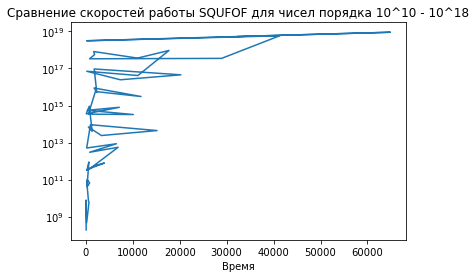

In [653]:
import time
from matplotlib import pylab as plt
from sage.misc.prandom import randrange
from sage.misc.randstate import current_randstate
from tqdm import tqdm

numbers = []
times = []
steps = []

def check_time(func):
    start_time = time.time()
    squfof(func)
    end_time = time.time()
    return end_time - start_time

for j in range(10,20):
    for i in range(5):
        def test(k=j):
            return randrange(10**k)
        with seed(i+1): test()
        with seed(i): numbers.append(test())

for i in tqdm(range(len(numbers))):
    while numbers[i]%2==0 or squfof(numbers[i])==0:
        numbers[i] += 1
    steps.append(step)   
            
for i in numbers:
    times.append(check_time(squfof(i)))
    

    
plt.title('Сравнение скоростей работы SQUFOF для чисел порядка 10^10 - 10^18') 
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Шаги')
plt.yscale('log')
plt.plot(steps, numbers)
plt.show()

In [476]:
for i in range(len(numbers)):
    numbers[i]=log(numbers[i]).n(6)

In [654]:
results = dict(zip(zip(numbers, times), steps))
#results.append()

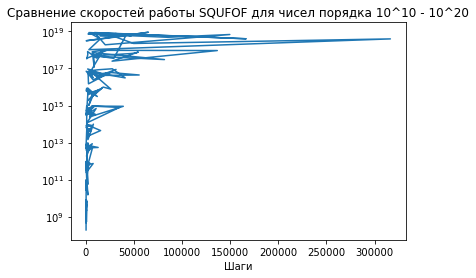

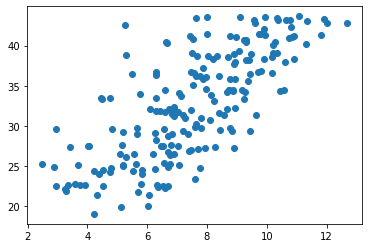

In [627]:
plt.title('Сравнение скоростей работы SQUFOF для чисел порядка 10^10 - 10^20') 
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Шаги')
plt.yscale('log')
plt.plot(steps, numbers)
plt.show()
plt.scatter(np.log(steps),np.log(numbers))
plt.show()

In [267]:
import numpy as np

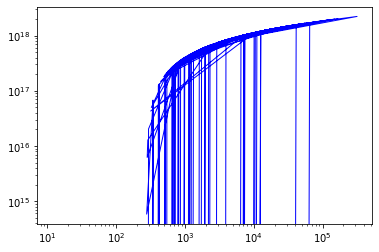

In [637]:
import numpy as np
numbers_np = np.array(numbers)
steps_np = np.array(steps)
a = np.polyfit(np.log(steps_np), numbers_np, 1)
numbers_np = a[0] * np.log(steps_np) + a[1]
plt.xscale('log')
plt.yscale('log')
plt.plot(steps_np, numbers_np, 'b', lw = 1)

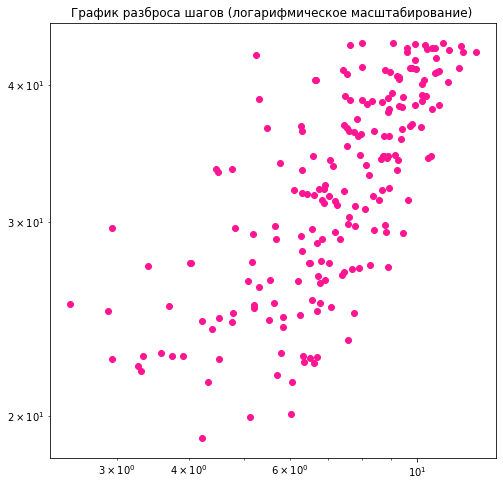

In [641]:
fig, ax = plt.subplots()

ax.scatter(np.log(steps), np.log(numbers),
           c = 'deeppink')    #  цвет точек

ax.set_facecolor('white')     #  цвет области Axes
ax.set_title('График разброса шагов (логарифмическое масштабирование) ')     #  заголовок для Axes
plt.xscale('log')
plt.yscale('log')
fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

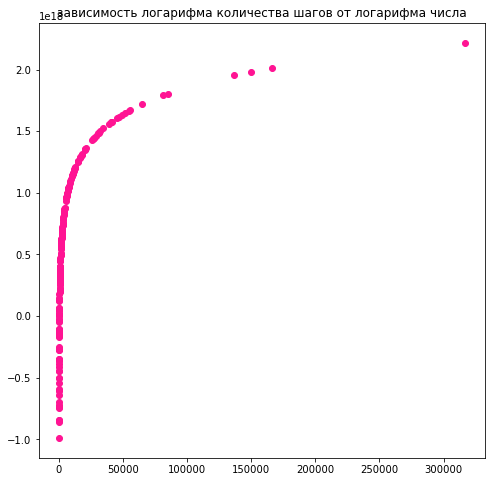

In [644]:
fig, ax = plt.subplots()

ax.scatter(steps, numbers_np,
           c = 'deeppink') 

ax.set_facecolor('white')    
ax.set_title('зависимость логарифма количества шагов от логарифма числа') 
fig.set_figwidth(8)     
fig.set_figheight(8)    


plt.show()

In [663]:
std(times)

0.0003463090686671937

In [665]:
std(steps).n()

12277.1196731720